# Statistical Analysis

In [1]:
#imports
#general----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#PCA----------------------------------
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#PCR----------------------------------
from sklearn.linear_model import LinearRegression
#sci-kit learn------------------------
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#stats linear reg---------------------
import statsmodels.api as sm

## Read in the data

In [35]:
#cols to include
cols = ["Free Ligand", "Energy / Hartree", "LEA", "Rel E / Kcal mol-1", "He8_steric / K cal mol-1", 
       "Pd-P (trans P)", "Pd-P (trans Cl)", "Pd-PR3", "Pd-Cl", "bite angle", "BE (Pd)", "ELUMO", 
        "EHOMO", "Q(Pd fragm.)" , "PA"]

#read in all the data and drop na values
lig_df = pd.read_excel("ligands.xlsx", sheet_name = 'Pd', skiprows = 6, usecols = cols).dropna()
lig_df

,Free Ligand,Energy / Hartree,LEA,Rel E / Kcal mol-1,Pd-P (trans P),Pd-P (trans Cl),Pd-PR3,Pd-Cl,bite angle,He8_steric / K cal mol-1,BE (Pd),EHOMO,ELUMO,Q(Pd fragm.),PA
0,Me3,-461.11852,-0.005480,-34.023195,2.37757,2.31760,2.399979,2.38968,96.12,3.00,38.500000,-0.19045,0.03268,-1.33000,233.00000
1,Me2OMe,-536.339256,-0.006583,-35.408086,2.35280,2.32120,2.379600,2.3952,96.8341,3.81,35.870000,-0.20130,0.00430,-1.28090,227.36000
2,tBu3,-814.95274,0.023843,2.777301,2.36980,2.32820,2.750300,2.4134,96.6112,23.38,23.900000,-0.17267,0.02754,-1.20000,250.80000
3,Cy3,-1047.286017,-0.000091,-27.259546,2.44530,2.31710,2.401060,2.3993,94.34393,16.65,36.790000,-0.17680,0.02590,-1.27000,250.40000
4,Ph3,-1036.3886,0.000000,-27.145691,2.38940,2.29920,2.373700,2.3984,99.5134,8.00,31.900000,-0.18694,-0.05061,-1.23000,241.30000
5,(o-tolyl)3,-1154.361873,0.017373,-5.342635,2.41079,2.33759,2.408160,2.40753,96.94,29.80,25.850000,-0.18170,-0.04870,-1.23000,244.10000
6,(m-tolyl)3,-1154.359443,-0.001197,-28.648476,2.37840,2.30070,2.389000,2.3983,99.8216,8.10,31.320000,-0.18275,-0.04686,-1.22843,245.55000
7,(p-tolyl)3,-1154.359669,-0.000728,-28.059897,2.38690,2.30070,2.378100,2.3987,99.8182,6.60,32.100000,-0.18042,-0.05171,-1.23000,247.60000
8,Ph2Fc,-1315.1588,-0.021714,-54.397173,2.40574,2.30291,2.360200,2.39911,96.0712,8.50,33.660000,-0.15410,-0.05080,-1.22690,244.71000
9,Xphos,-1628.6097,0.014460,-8.997802,2.41588,2.31263,2.458400,2.43223,95.04713,22.15,31.290000,-0.18080,-0.05030,-1.23680,255.65000


## Visualise your data

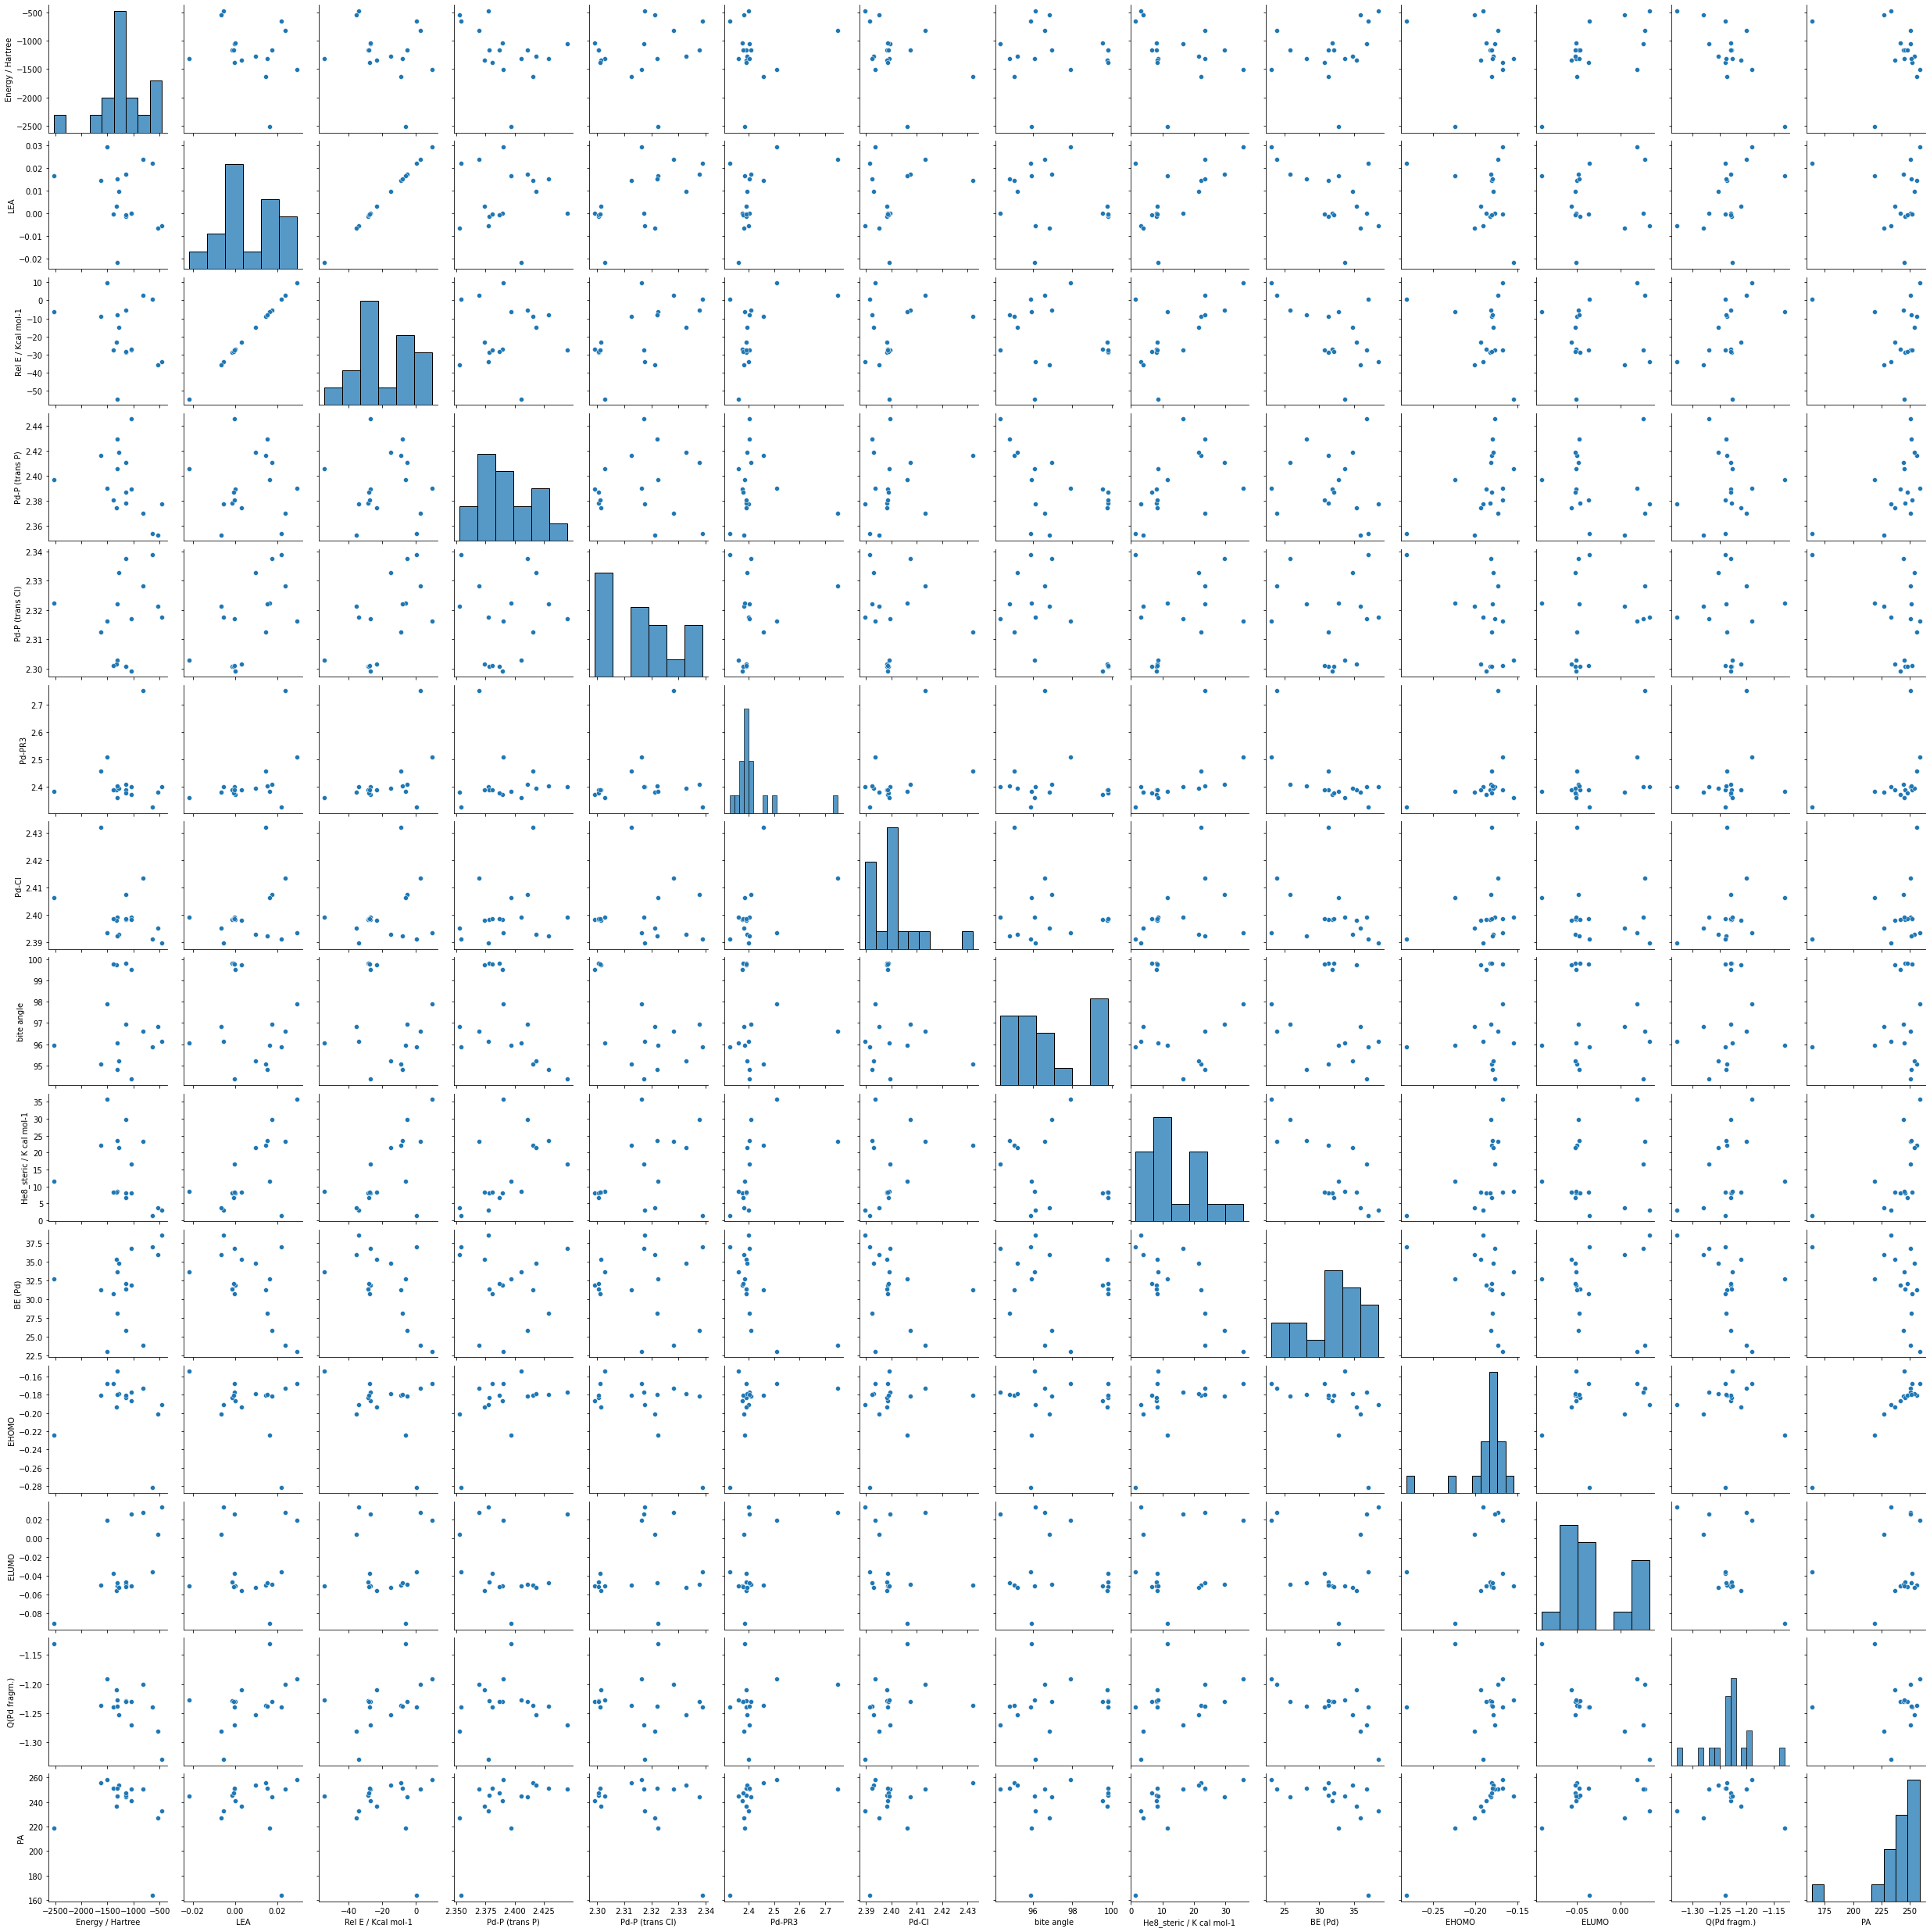

In [3]:
sns.pairplot(data = lig_df);

<AxesSubplot:>

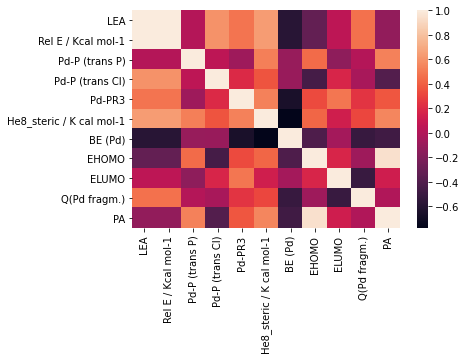

In [4]:
sns.heatmap(lig_df.corr())

## Single variable linear regression for each param
-------------
* Clearly fitting a model using one parameter results in very badly fitted models, many of which do not have correlation at all to the potential energy equilibrium

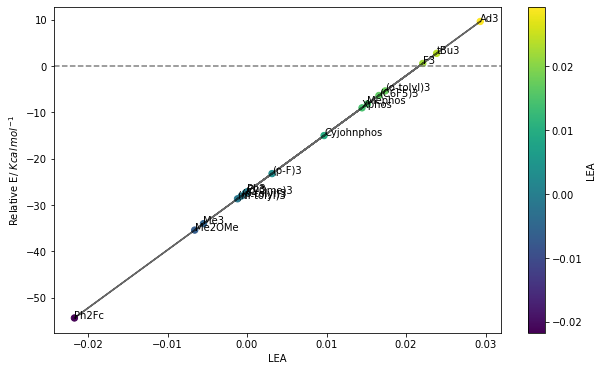

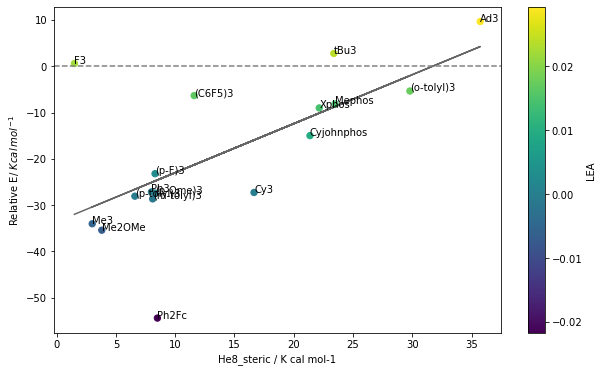

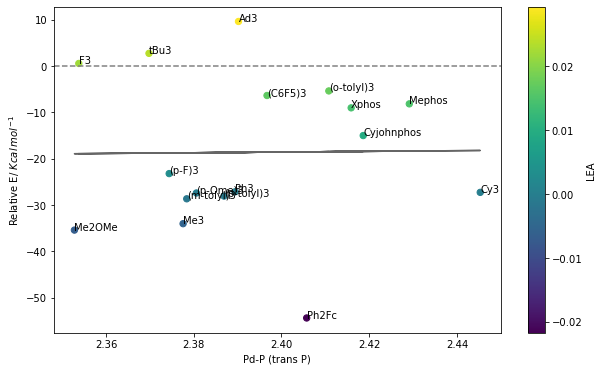

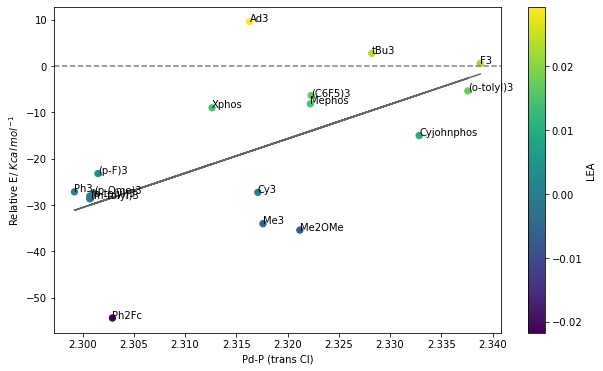

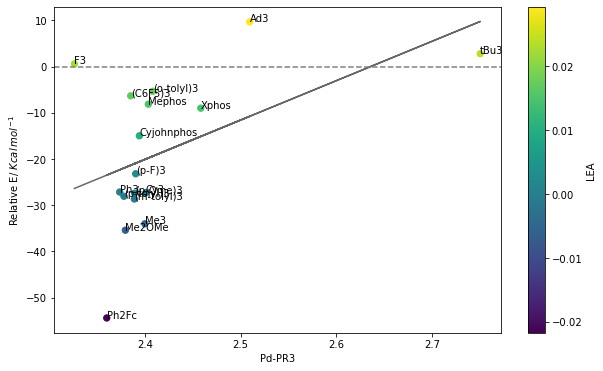

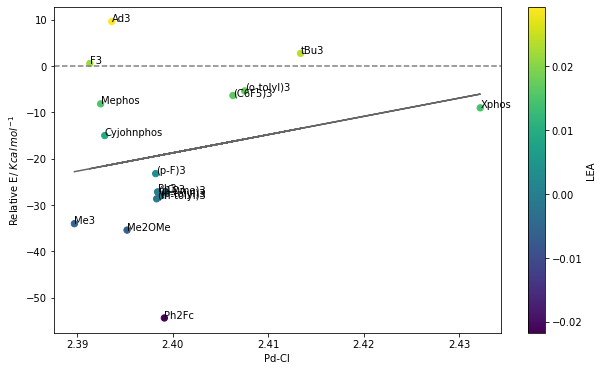

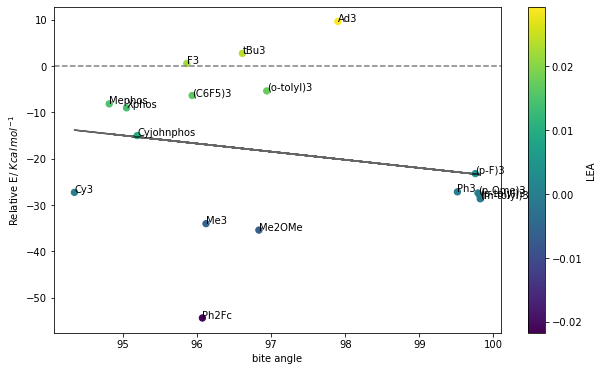

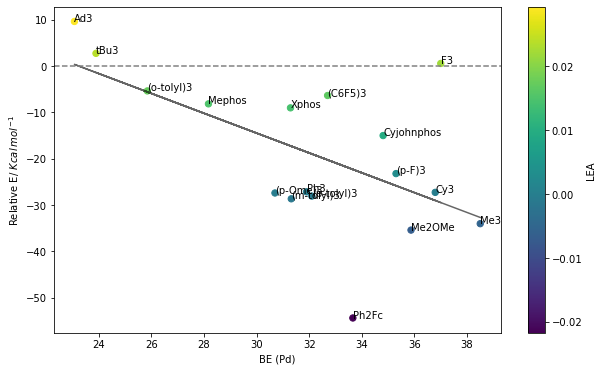

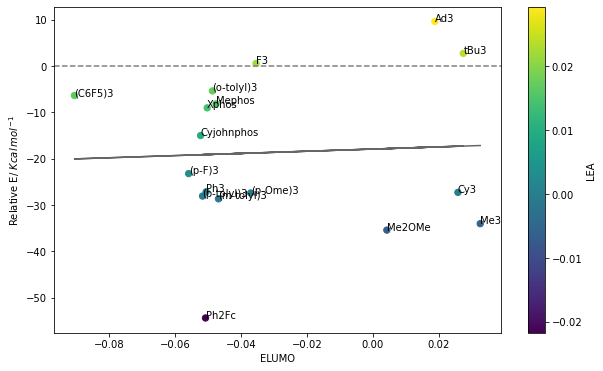

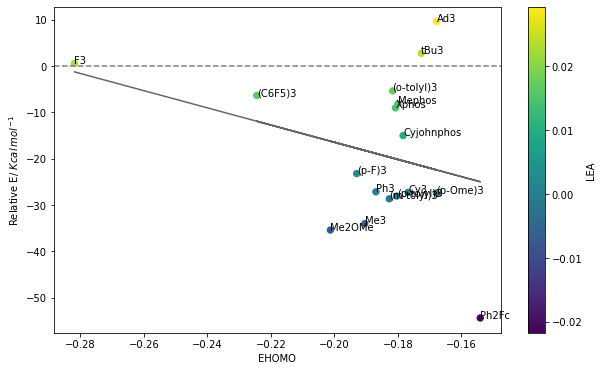

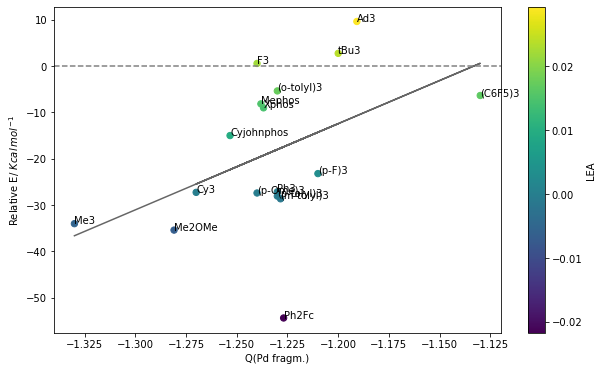

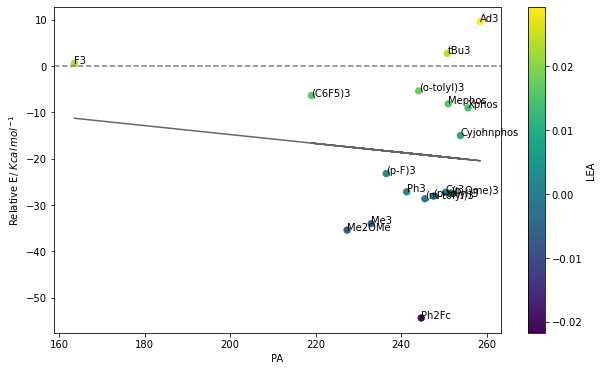

In [6]:
#total list of features
params = ["LEA","He8_steric / K cal mol-1", "Pd-P (trans P)","Pd-P (trans Cl)","Pd-PR3","Pd-Cl","bite angle", "BE (Pd)", "ELUMO", 
        "EHOMO", "Q(Pd fragm.)" , "PA"]
rmse_store = []
r2_store = []

#color scale
c='LEA'

#make each regression
for col in params:
    
    #linear regression
    model = linear_model.LinearRegression(fit_intercept=True)
    
    X = lig_df[[col]]
    y = lig_df['Rel E / Kcal mol-1']

    model.fit(X,y)
    pred = model.predict(X)
    
    #plot
    fig, ax = plt.subplots(figsize=(10,6))

    scatter = ax.scatter(x=X, y=y, s = 40, c=lig_df[c],)
    plt.colorbar(scatter, ax=ax, label = c)
    
    plt.plot(X,pred,c='black',alpha=0.6)
    
    #title, labels, line at 0
    plt.axhline(color = 'grey', linestyle = '--')
    ax.set(xlabel = col, ylabel = 'Relative E/ $Kcal \: mol^{-1}$');
    for i, label in enumerate(lig_df['Free Ligand']):
        ax.text(X.iloc[i], y.iloc[i], label)
    
    #calculate the root mean squared error and R-squared value
    rmse = mean_squared_error(y, pred, squared = False)
    rmse_store.append(rmse)
    
    r2 = r2_score(y, pred)
    r2_store.append(r2)

### Analyse single variable linear reg models

In [7]:
#analyse model
reg_df = pd.DataFrame({'RMSE':rmse_store, 'R2 score': r2_store}, index = params)
reg_df

,RMSE,R2 score
LEA,5.378843e-10,1.000000
He8_steric / K cal mol-1,1.229975e+01,0.416049
Pd-P (trans P),1.609455e+01,0.000135
Pd-P (trans Cl),1.284571e+01,0.363058
Pd-PR3,1.408282e+01,0.234470
Pd-Cl,1.561145e+01,0.059259
bite angle,1.574573e+01,0.043006
BE (Pd),1.305734e+01,0.341899
ELUMO,1.607398e+01,0.002690
EHOMO,1.525314e+01,0.101948


# PCA/PCR Analysis
------------------
Which variables have greatest variance?

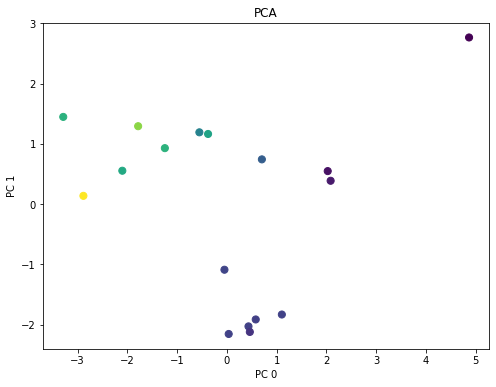

In [8]:
#sort the data
colour_list = lig_df["Free Ligand"].tolist()
pca_df = lig_df.drop(columns = ["Free Ligand", 'Energy / Hartree', 'LEA', 'Rel E / Kcal mol-1'])
#scale your dataframe
scaled_df = StandardScaler().fit_transform(pca_df)

#do the principle component analysis
n=11
pca = PCA(n_components = n)
#apply the dimensionality reduction onto the data
pca_data = pca.fit_transform(scaled_df)

#plot the data
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x = pca_data[:, 0], y = pca_data[:, 1], s = 50, c = lig_df['He8_steric / K cal mol-1'])
ax.set(title = "PCA", xlabel = "PC 0", ylabel = "PC 1");

Not the best groups, but points roughly stick together based on He8_steric

In [9]:
variances = pca.explained_variance_ratio_
ind_var = variances.tolist()
individual_var = [i*100 for i in ind_var]

# Calculate the cumulative explained variance
cum_var = np.cumsum(individual_var)

pd.DataFrame({'PC':pca_df.columns, 'Individual Variance / %': individual_var, 'Cumulative variance / %': cum_var})

,PC,Individual Variance / %,Cumulative variance / %
0,Pd-P (trans P),33.857892,33.857892
1,Pd-P (trans Cl),20.260386,54.118278
2,Pd-PR3,16.992683,71.110962
3,Pd-Cl,14.520005,85.630966
4,bite angle,7.519594,93.150560
5,He8_steric / K cal mol-1,2.996791,96.147351
6,BE (Pd),1.669461,97.816812
7,EHOMO,0.904895,98.721706
8,ELUMO,0.719499,99.441206
9,Q(Pd fragm.),0.377879,99.819085


First 4 PC capture 85.5% of the data. But which feature is most important for each PC?

#### Build a dataframe with the most important features for each PC

In [10]:
# feature names
feature_names = pca_df.columns

# get the index of the most important feature on each component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n)]
# get the names
most_important_names = [feature_names[most_important[i]] for i in range(n)]
# create dic of pc number and most important feature
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n)}
# build the dataframe
df = pd.DataFrame(dic.items(), columns=['PC', 'Feature Name'])
df['Loading'] = [np.abs(pca.components_[i]).max() for i in range(n)]

#second dataframe which includes descriptors for each PC with loadings above 0.3
df2 = pd.DataFrame({'features': feature_names, 'PC0': np.abs(pca.components_[0]), 'PC1': np.abs(pca.components_[1]), 'PC2': np.abs(pca.components_[2])})
#filter out values below 0.3
df2[['PC0','PC1','PC2']] = df2[['PC0','PC1','PC2']].apply(lambda x: np.where(x < 0.3, np.nan, x))
df2

,features,PC0,PC1,PC2
0,Pd-P (trans P),NaN,NaN,NaN
1,Pd-P (trans Cl),NaN,0.626839,NaN
2,Pd-PR3,0.355509,NaN,NaN
3,Pd-Cl,NaN,NaN,NaN
4,bite angle,NaN,0.554869,NaN
5,He8_steric / K cal mol-1,0.445508,NaN,NaN
6,BE (Pd),0.414382,NaN,NaN
7,EHOMO,0.382623,0.309295,0.318549
8,ELUMO,NaN,NaN,0.430932
9,Q(Pd fragm.),NaN,NaN,0.622960


He8_steric most important for the first 33.7% of the explained variance.

The table describes which feature is the most important (highest abs loading) for each principal component

## PCR

R-squared: 0.7179173636228955
Root Mean Squared Error: 8.548629322891978


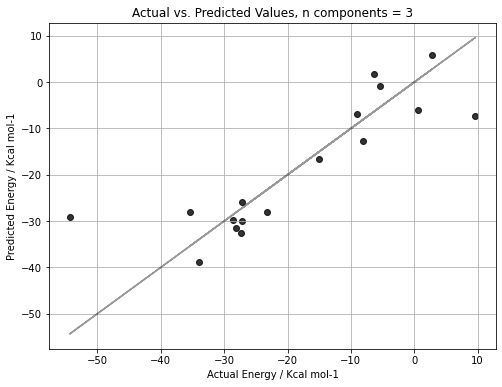

In [11]:
X = scaled_df
y = lig_df['Rel E / Kcal mol-1']

# Perform PCA
n_components = 3
pca1 = PCA(n_components=n_components)
X_pca = pca1.fit_transform(X)

# Fit Linear Regression on PCA-transformed data
reg = LinearRegression()
reg.fit(X_pca, y)

# Predictions
y_pred = reg.predict(X_pca)

# Evaluate model performance
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

# Plot actual vs. predicted values
fig,ax = plt.subplots(figsize=(8, 6))

ax.scatter(y, y_pred, color='black', alpha=0.8)
ax.plot(y, y, color='black', alpha=0.4)

ax.set(title = f'Actual vs. Predicted Values, n components = {n_components}', xlabel = 'Actual Energy / Kcal mol-1', ylabel ='Predicted Energy / Kcal mol-1')
plt.grid(True);

# Stats models MVR
-----------------------

First define function to fit the model, plot measured vs predicted values, and analyse the coefficients

In [12]:
def model(params, print_summary=False, return_pval=True, return_MeasVsPred_graph=True, return_coef_graph = True):
    '''
    Fit a stats models linear regression with the option to make diagnostic plots
    ----------
    Inputs:
        params: series of parameters taken from the LKB used as predictor variables in the model
        print_summary: bool
        return_pval: bool
        return_MeasVsPred_graph: bool
        return_coef_graph: bool
    ----------
    Outputs
        print_summary: if true, whether to print statsmodels summary
        return_pval: if true, returns data frame containg the regression coef for each parameter and its p-value
        return_MeasVsPred_graph: if true, returns diagnostic measured vs predicted plot, coloured by the He8_steric param
        return_coef_graph: if true, returns bar graph of coefs
    '''
    
    #clean up data frame
    lig_mvr_df = lig_df[params].apply(pd.to_numeric)

    #fit model using statsmodels
    Y_ = lig_df['Rel E / Kcal mol-1']
    X_ = sm.add_constant(lig_mvr_df)

    model = sm.OLS(Y_.astype(float), X_.astype(float)).fit()
    predictions = model.predict(X_)
    
    print(pd.DataFrame({'lig':lig_df['Free Ligand'], 'pred':predictions, 'actual':Y_}).sort_values(by='pred'))
    
    if print_summary:
        print(model.summary())
    #------------------------------------------
    
    #plot measured vs predicted
    if return_MeasVsPred_graph:
        fig, ax = plt.subplots(figsize=(9,6))

        ax.scatter(Y_, predictions, c='black', alpha=0.8)
        ax.plot(Y_, Y_, c='black', alpha=0.4, label='Prediction')
        ax.axhline(c = 'grey', linestyle = '--', alpha = 0.7)

        #label scatter points
        for i, label in enumerate(lig_df['Free Ligand']):
            ax.text(Y_.iloc[i], predictions.iloc[i], label)

        ax.legend(loc='best')
        ax.set(title = 'measured vs predicted', xlabel = "measured", ylabel="predicted");
    #-------------------------------------------

    #plot coefs
    coeffs = model.params
    #normalise
    c = coeffs[1:] * lig_mvr_df.std()
    
    if return_coef_graph:
        #plot
        fig,ax1 = plt.subplots(figsize=(9,6))

        ax1.axhline(color='black', alpha = 0.5, linestyle='--')

        ax1.bar(range(1, len(c) + 1), c)

        plt.xticks(range(len(coeffs)), list(coeffs.index), rotation=90)
        ax1.set(title='Feature importance', xlabel = 'Feature, corrected by the features std. dev.', ylabel='value');
        ax1.grid(alpha=0.4)
    #--------------------------------------------------
    
    #outputs
    #print r squared
    print("r2:", model.rsquared)
    print("RMSE:", np.sqrt(np.mean((Y_-predictions)**2)))
    
    #make df containing absolute coefs and p vals, sort df with most important coefs at top
    p_df = pd.DataFrame({'std coef':np.abs(c), 'p val':model.pvalues[0:]}).sort_values(by = 'std coef', ascending=False)
    
    if return_pval:
        #return sorted df
        return p_df
    else:
        return model

### First model - include every paramater (backward feature selection)

           lig       pred     actual
8        Ph2Fc -53.649845 -54.397173
0          Me3 -36.637294 -34.023195
11    (p-Ome)3 -34.264131 -27.392879
1       Me2OMe -31.692889 -35.408086
7   (p-tolyl)3 -28.864662 -28.059897
3          Cy3 -26.074081 -27.259546
6   (m-tolyl)3 -25.035718 -28.648476
4          Ph3 -24.140934 -27.145691
10      (p-F)3 -22.339291 -23.201718
12  Cyjohnphos -15.838458 -14.984243
9        Xphos -10.087221  -8.997802
13     (C6F5)3  -7.576435  -6.329105
15      Mephos  -7.499266  -8.135115
5   (o-tolyl)3  -3.995420  -5.342635
16          F3  -0.490714   0.591759
2         tBu3   3.389307   2.777301
14         Ad3   8.506388   9.665836
r2: 0.9768700918973616
RMSE: 2.447908964263254


,std coef,p val
EHOMO,23.001528,0.003988
He8_steric / K cal mol-1,13.139900,0.030459
PA,8.032307,0.219634
Pd-PR3,6.940898,0.086619
Pd-P (trans Cl),2.634376,0.450770
BE (Pd),2.289021,0.525901
Pd-Cl,1.904527,0.320511
Q(Pd fragm.),1.809024,0.501952
ELUMO,1.773691,0.543944
bite angle,1.407239,0.642724


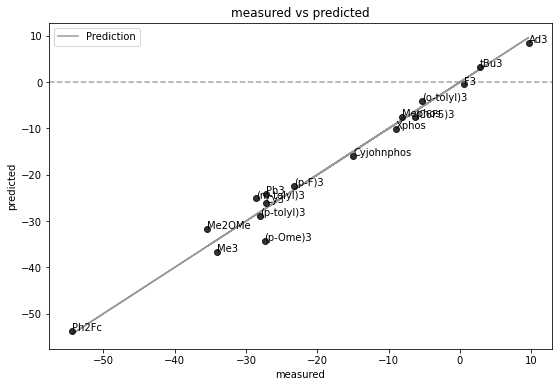

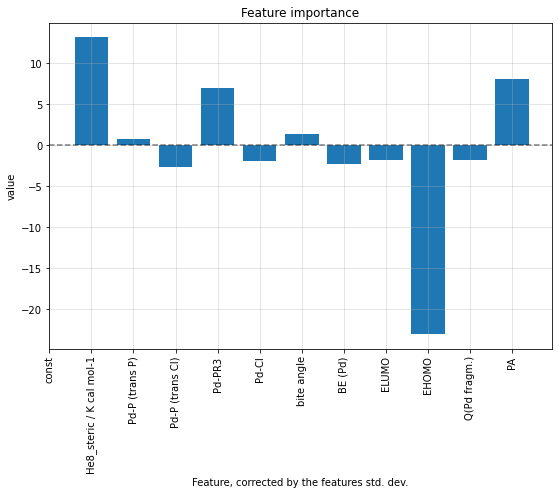

In [13]:
#First lets do all params
params = ["He8_steric / K cal mol-1", "Pd-P (trans P)", "Pd-P (trans Cl)","Pd-PR3","Pd-Cl","bite angle", "BE (Pd)", "ELUMO", "EHOMO", "Q(Pd fragm.)" , "PA"]
model(params)

**Comments**
- Model is clearly overfitted
- I would have predicted that He8_steric would have had a greater influence
- Interesting that PA has such a high p-value, considering how it decreases as features are removed
- There are clearly insignificant params here
- Obvious that the most important parameters here are He8, Pd-PR3, PA and EHOMO

**Lets remove Pd-P (trans-P), bite angle and Q (Pd fragm)**

           lig       pred     actual
8        Ph2Fc -52.777086 -54.397173
0          Me3 -37.158256 -34.023195
11    (p-Ome)3 -34.358553 -27.392879
1       Me2OMe -30.367315 -35.408086
7   (p-tolyl)3 -29.166919 -28.059897
3          Cy3 -25.363882 -27.259546
6   (m-tolyl)3 -25.353430 -28.648476
4          Ph3 -24.981168 -27.145691
10      (p-F)3 -23.604172 -23.201718
12  Cyjohnphos -16.493177 -14.984243
9        Xphos -10.532358  -8.997802
15      Mephos  -7.224267  -8.135115
5   (o-tolyl)3  -5.216503  -5.342635
13     (C6F5)3  -4.772691  -6.329105
16          F3  -1.387203   0.591759
2         tBu3   3.222741   2.777301
14         Ad3   9.243574   9.665836
r2: 0.9729576526875627
RMSE: 2.6468571439015887


,std coef,p val
EHOMO,23.651636,0.000200
He8_steric / K cal mol-1,11.270396,0.004316
PA,10.422812,0.040934
Pd-PR3,5.253709,0.036424
BE (Pd),3.204951,0.206068
Pd-P (trans Cl),2.127550,0.301447
Pd-Cl,1.816741,0.207039
ELUMO,0.458460,0.770746
const,NaN,0.444914


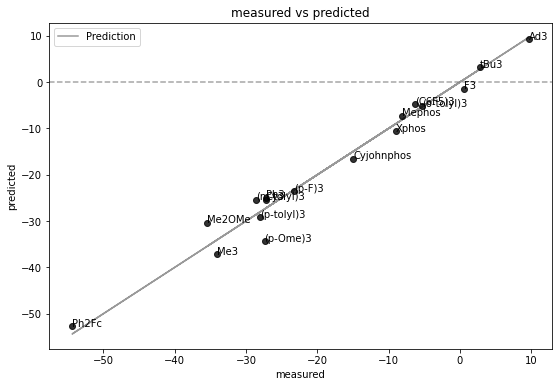

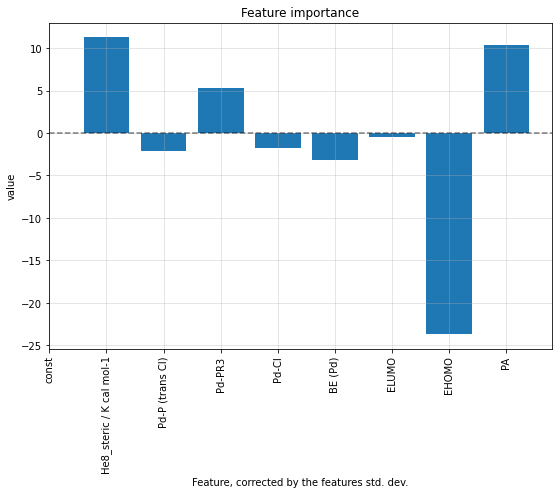

In [14]:
params1 = ["He8_steric / K cal mol-1", "Pd-P (trans Cl)","Pd-PR3","Pd-Cl", "BE (Pd)", "ELUMO", "EHOMO" , "PA"]
model(params1)

**Comments**
- Still overfitted.
- PA still has large p-value

**Next remove ELUMO and Pd-Cl**

           lig       pred     actual
8        Ph2Fc -51.846427 -54.397173
0          Me3 -37.887082 -34.023195
11    (p-Ome)3 -34.136908 -27.392879
1       Me2OMe -29.994550 -35.408086
7   (p-tolyl)3 -29.335466 -28.059897
6   (m-tolyl)3 -25.683387 -28.648476
3          Cy3 -25.344702 -27.259546
4          Ph3 -25.278498 -27.145691
10      (p-F)3 -24.617471 -23.201718
12  Cyjohnphos -18.141920 -14.984243
15      Mephos  -8.690666  -8.135115
9        Xphos  -6.521252  -8.997802
13     (C6F5)3  -4.315058  -6.329105
5   (o-tolyl)3  -3.435621  -5.342635
16          F3  -1.495644   0.591759
2         tBu3   3.183201   2.777301
14         Ad3   7.250787   9.665836
r2: 0.965882253262186
RMSE: 2.973024441481874


,std coef,p val
EHOMO,22.639232,0.000064
He8_steric / K cal mol-1,10.576057,0.003374
PA,9.655276,0.041462
Pd-PR3,4.091046,0.015011
BE (Pd),3.774670,0.093893
Pd-P (trans Cl),1.599441,0.419370
const,NaN,0.791474


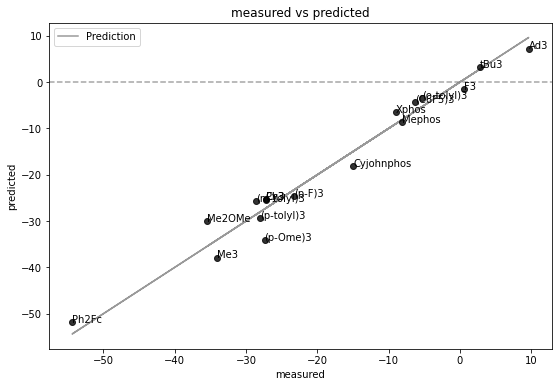

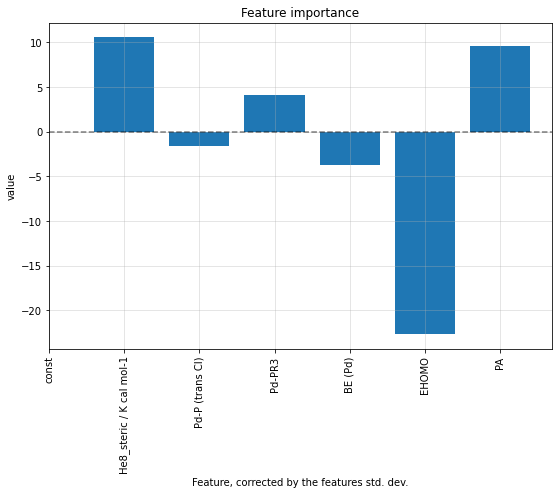

In [15]:
params2 = ["He8_steric / K cal mol-1", "Pd-P (trans Cl)","Pd-PR3","BE (Pd)", "EHOMO", "PA"]
model(params2)

**Comments**
- Model looking better now
- Still very high r2, but it does not decrease really, still only down to 0.86 for just ehomo and he8

**Next remove Pd-P (trans-Cl)**

           lig       pred     actual
8        Ph2Fc -52.329212 -54.397173
0          Me3 -37.377696 -34.023195
11    (p-Ome)3 -33.800208 -27.392879
7   (p-tolyl)3 -29.164705 -28.059897
1       Me2OMe -28.907288 -35.408086
10      (p-F)3 -26.031746 -23.201718
3          Cy3 -25.871556 -27.259546
4          Ph3 -25.868941 -27.145691
6   (m-tolyl)3 -25.806202 -28.648476
12  Cyjohnphos -16.963458 -14.984243
15      Mephos  -8.076961  -8.135115
9        Xphos  -7.369068  -8.997802
13     (C6F5)3  -4.320493  -6.329105
5   (o-tolyl)3  -2.149966  -5.342635
16          F3  -1.774573   0.591759
2         tBu3   3.612247   2.777301
14         Ad3   5.909164   9.665836
r2: 0.9634623632245615
RMSE: 3.076653134476663


,std coef,p val
EHOMO,22.812825,0.000033
PA,11.186844,0.010886
He8_steric / K cal mol-1,8.780410,0.000379
BE (Pd),4.664044,0.020307
Pd-PR3,3.630751,0.015372
const,NaN,0.000288


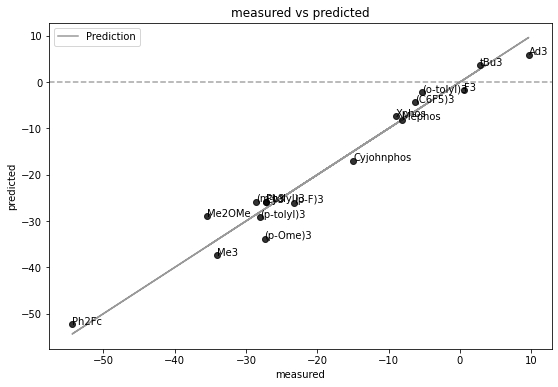

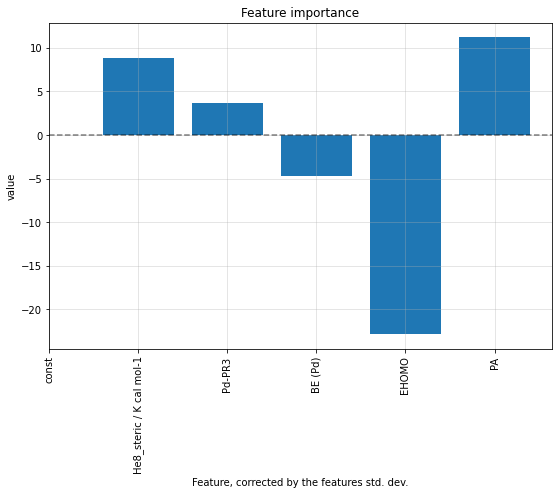

In [16]:
params3 = ["He8_steric / K cal mol-1", "Pd-PR3","BE (Pd)", "EHOMO", "PA"]
model(params3)

This model has the five most important features for PC0, which captures the highest proportion of variance in the data.
Its probably still overfitted.
</p>
this could be the final model


Its not until EHOMO is removed that PF3 veers off from the regression

           lig       pred     actual
8        Ph2Fc -51.059713 -54.397173
0          Me3 -40.043844 -34.023195
11    (p-Ome)3 -32.045048 -27.392879
1       Me2OMe -29.582262 -35.408086
7   (p-tolyl)3 -27.676421 -28.059897
3          Cy3 -27.384269 -27.259546
10      (p-F)3 -26.679440 -23.201718
6   (m-tolyl)3 -24.380781 -28.648476
4          Ph3 -24.192200 -27.145691
12  Cyjohnphos -17.156715 -14.984243
9        Xphos  -8.302132  -8.997802
15      Mephos  -5.492472  -8.135115
2         tBu3  -5.159382   2.777301
13     (C6F5)3  -3.681295  -6.329105
16          F3  -1.782110   0.591759
5   (o-tolyl)3   1.296967  -5.342635
14         Ad3   7.030454   9.665836
r2: 0.9361931844367064
RMSE: 4.06576098803744


,std coef,p val
EHOMO,22.948694,0.000178
PA,11.607238,0.027407
He8_steric / K cal mol-1,8.865580,0.001696
BE (Pd),6.821919,0.004517
const,NaN,0.004839


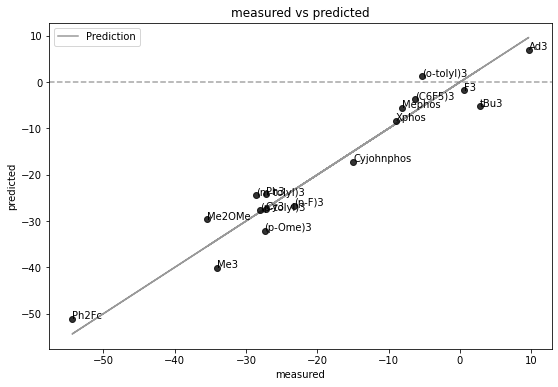

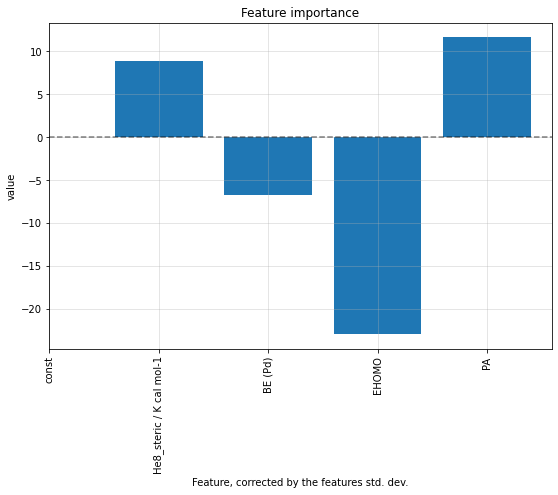

In [17]:
params4 = ["He8_steric / K cal mol-1","BE (Pd)", "EHOMO", "PA"]
model(params4)

I think this might be underfitted. The tBu3 group has moved down below 0 which does not make intuitive sense

           lig       pred     actual
8        Ph2Fc -41.986959 -54.397173
11    (p-Ome)3 -36.434197 -27.392879
0          Me3 -35.199183 -34.023195
7   (p-tolyl)3 -33.799311 -28.059897
6   (m-tolyl)3 -30.452653 -28.648476
1       Me2OMe -29.319919 -35.408086
4          Ph3 -28.831011 -27.145691
10      (p-F)3 -25.782577 -23.201718
3          Cy3 -19.540959 -27.259546
12  Cyjohnphos -11.443470 -14.984243
2         tBu3 -10.717029   2.777301
9        Xphos  -9.198689  -8.997802
15      Mephos  -7.448011  -8.135115
13     (C6F5)3  -7.235939  -6.329105
16          F3   1.258698   0.591759
5   (o-tolyl)3   3.206586  -5.342635
14         Ad3   6.633958   9.665836
r2: 0.8505566104482686
RMSE: 6.222238643547119


,std coef,p val
He8_steric / K cal mol-1,15.886553,8.009350e-07
EHOMO,12.103211,1.710363e-05
const,NaN,5.517479e-07


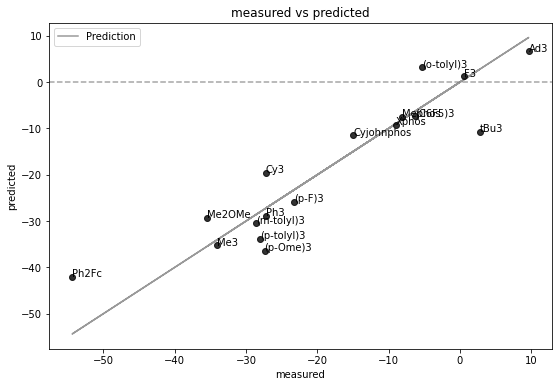

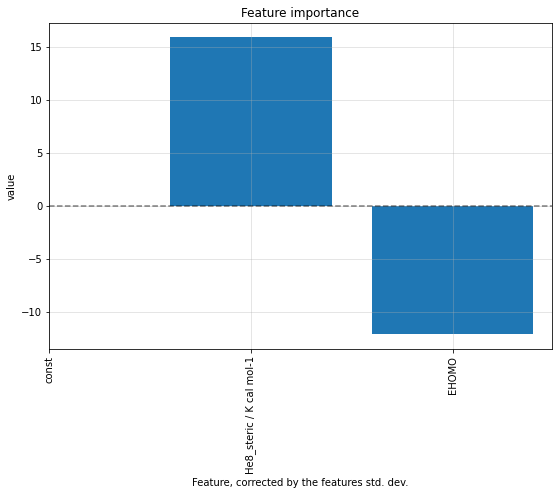

In [18]:
params5 = ["He8_steric / K cal mol-1", "EHOMO"]
model(params5)

           lig       pred     actual
16          F3 -31.980482   0.591759
0          Me3 -30.392428 -34.023195
1       Me2OMe -29.534879 -35.408086
7   (p-tolyl)3 -26.581100 -28.059897
4          Ph3 -25.098916 -27.145691
6   (m-tolyl)3 -24.993046 -28.648476
10      (p-F)3 -24.781305 -23.201718
11    (p-Ome)3 -24.781305 -27.392879
8        Ph2Fc -24.569565 -54.397173
13     (C6F5)3 -21.287587  -6.329105
3          Cy3 -15.941139 -27.259546
12  Cyjohnphos -10.944064 -14.984243
9        Xphos -10.118276  -8.997802
2         tBu3  -8.816072   2.777301
15      Mephos  -8.710201  -8.135115
5   (o-tolyl)3  -2.019202  -5.342635
14         Ad3   4.258904   9.665836
r2: 0.4160494855703375
RMSE: 12.29975134618273


,std coef,p val
He8_steric / K cal mol-1,10.701515,0.005177
const,NaN,0.000023


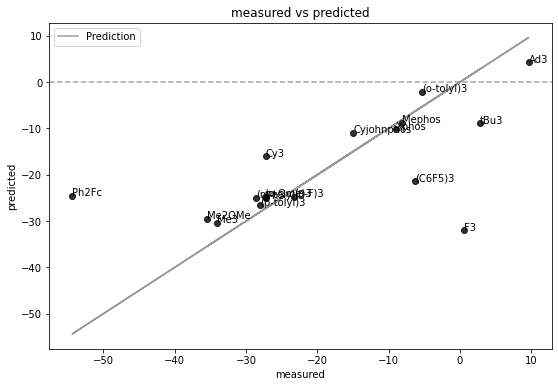

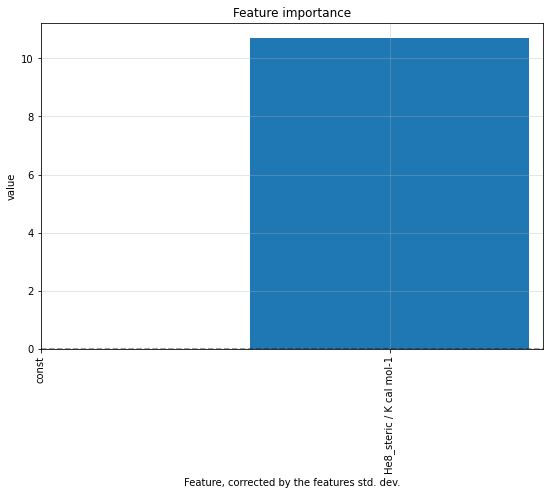

In [19]:
model(params='He8_steric / K cal mol-1')

           lig       pred     actual
8        Ph2Fc -24.963849 -54.397173
14         Ad3 -22.414496   9.665836
11    (p-Ome)3 -22.395915 -27.392879
2         tBu3 -21.513304   2.777301
3          Cy3 -20.745897 -27.259546
12  Cyjohnphos -20.448597 -14.984243
15      Mephos -20.151296  -8.135115
7   (p-tolyl)3 -20.073255 -28.059897
9        Xphos -20.002646  -8.997802
5   (o-tolyl)3 -19.835414  -5.342635
6   (m-tolyl)3 -19.640311 -28.648476
4          Ph3 -18.861755 -27.145691
0          Me3 -18.209552 -34.023195
10      (p-F)3 -17.733871 -23.201718
1       Me2OMe -16.193482 -35.408086
13     (C6F5)3 -11.886341  -6.329105
16          F3  -1.220684   0.591759
r2: 0.10194762945747582
RMSE: 15.253135941569004


,std coef,p val
EHOMO,5.297383,0.211585
const,NaN,0.066657


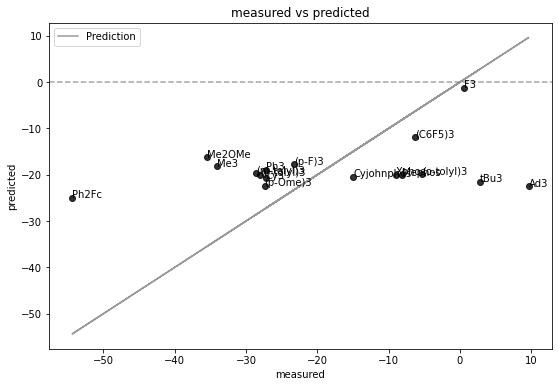

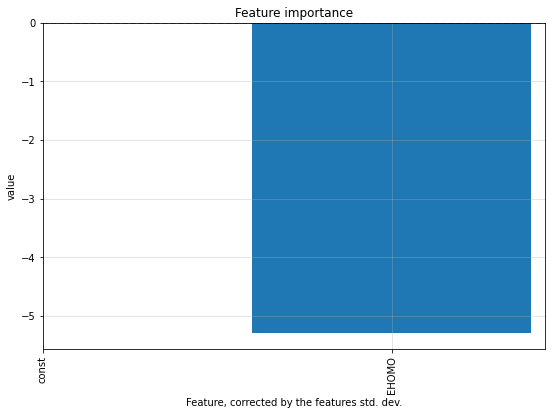

In [20]:
model(params='EHOMO')

# Investigating the model without extreme data points
--------------
* Drop PF3, PC6F5 and PPh2Fc

           lig       pred     actual
1       Me2OMe -35.358872 -35.408086
0          Me3 -34.380495 -34.023195
7   (p-tolyl)3 -30.453023 -28.059897
11    (p-Ome)3 -27.241927 -27.392879
3          Cy3 -26.949414 -27.259546
6   (m-tolyl)3 -26.431640 -28.648476
4          Ph3 -26.377942 -27.145691
10      (p-F)3 -23.694068 -23.201718
12  Cyjohnphos -14.570214 -14.984243
9        Xphos  -9.119867  -8.997802
15      Mephos  -8.483348  -8.135115
5   (o-tolyl)3  -5.379017  -5.342635
2         tBu3   2.853047   2.777301
14         Ad3   9.430635   9.665836
r2: 0.9953537023161777
RMSE: 0.9293731168674368


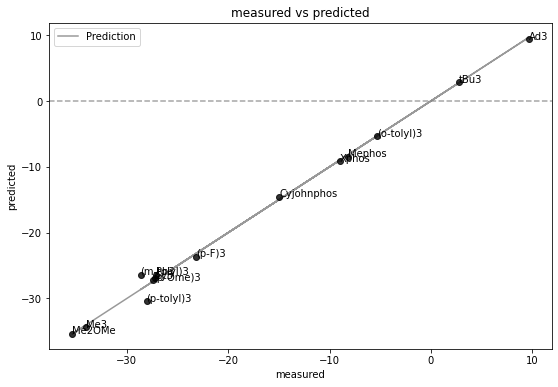

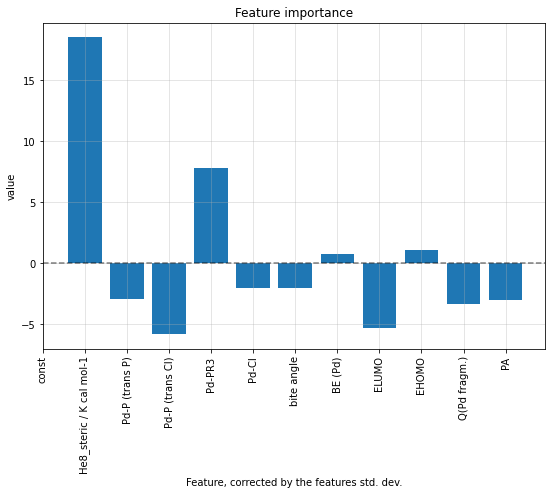

In [21]:
#duplicate lig_df
lig_df_dupe = lig_df

#drop ligands
lig_df_small = lig_df.drop(index=[8,13,16])
lig_df = lig_df_small

#investigate the model
model(params)

#reassign lig_df
lig_df = lig_df_dupe

# Make Predictions
------------------------------------------
Quickly chosen a couple of ligands from lkb - lets see what the model predicts

In [22]:
#read in ligs you want to make predictions from
df_pred = pd.read_excel("ligands.xlsx", sheet_name="Pred")
df_pred_ = df_pred.drop(['Ligand', 'ELUMO', 'Q(Pd fragm.)'], axis=1)

#add constant
df_pred_ = sm.add_constant(df_pred_)

#make predictions
new_ypred = model(params4, return_MeasVsPred_graph=False, return_coef_graph=False, return_pval=False).predict(df_pred_)

pd.DataFrame({'Ligand':df_pred['Ligand'], 'Pred Rel E': new_ypred}).sort_values(by = 'Pred Rel E', ascending=False)

           lig       pred     actual
8        Ph2Fc -51.059713 -54.397173
0          Me3 -40.043844 -34.023195
11    (p-Ome)3 -32.045048 -27.392879
1       Me2OMe -29.582262 -35.408086
7   (p-tolyl)3 -27.676421 -28.059897
3          Cy3 -27.384269 -27.259546
10      (p-F)3 -26.679440 -23.201718
6   (m-tolyl)3 -24.380781 -28.648476
4          Ph3 -24.192200 -27.145691
12  Cyjohnphos -17.156715 -14.984243
9        Xphos  -8.302132  -8.997802
15      Mephos  -5.492472  -8.135115
2         tBu3  -5.159382   2.777301
13     (C6F5)3  -3.681295  -6.329105
16          F3  -1.782110   0.591759
5   (o-tolyl)3   1.296967  -5.342635
14         Ad3   7.030454   9.665836
r2: 0.9361931844367064
RMSE: 4.06576098803744


,Ligand,Pred Rel E
2,H2Cl,-18.401327
3,PtBu2Cy,-20.840360
4,PCy2tBu,-29.824462
1,(p-Me2NPh)3,-41.915552
0,(NMe2)3,-42.812292
5,PFc3,-53.899204


These predictions make sense:
- H2Cl is small but super electronegative which raises the energy
- 3 and 4 are fairly stable - where 3 has a higher energy as expected given its larger steric bulk
- 1, 0 and 5 are all electron donating and have small He8_steric values, so very stable

In [25]:
def model_tts(params, print_summary=False):
    '''
    Fit a train test split stats models linear regression with the option to make diagnostic plots
    ----------
    Inputs:
        params: series of parameters taken from the LKB used as predictor variables in the model
        print_summary: bool
    ----------
    Outputs
        print_summary: if true, whether to print statsmodels summary
        
        Overall the function outputs
        - RMSE and R2 error estimates
        - Dataframe containing feature coefficients
        - Measured vs Predicted Diagnostic plot
        - Standardised coefficient bar plot
    '''
    
    #clean up data frame. includes all features
    lig_df_ = lig_df[params]
    lig_mvr_df = lig_df_.apply(pd.to_numeric)

    # with statsmodels
    Y_ = lig_df['Rel E / Kcal mol-1']
    X_ = lig_mvr_df
    
    X_train, X_test, y_train, y_test = train_test_split(X_, Y_,
                                                       test_size =  0.4,
                                                       shuffle = True,
                                                       random_state = 42)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    y_train = y_train.values.ravel()

    model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()
    predictions = model.predict(X_test)
    
    if print_summary:
        print(model.summary())
    #------------------------------------------

    #plot measured vs predicted
    fig, ax = plt.subplots()

    ax.scatter(y_test, predictions)
    print(y_test.index)
    ax.plot(y_test, y_test, c='orange')
    ax.axhline(c = 'grey', linestyle = '--', alpha = 0.7)

    #label scatter points
    for i, ligand in enumerate(y_test.index):
        label = lig_df.loc[ligand, 'Free Ligand']
        ax.text(y_test.iloc[i], predictions.iloc[i], label)

    ax.set(title = 'measured vs predicted', xlabel = "measured", ylabel="predicted");
    #-------------------------------------------

    #plot coefs
    coeffs = model.params
    #normalise
    c = coeffs[1:] * lig_mvr_df.std()

    #plot
    fig,ax1 = plt.subplots()

    ax1.axhline(color='black', alpha = 0.5, linestyle='--')

    ax1.bar(range(1, len(c) + 1), c)

    plt.xticks(range(len(coeffs)), list(coeffs.index), rotation=90)
    ax1.set(title='Feature importance', xlabel = 'Feature, corrected by the features std. dev.', ylabel='value');
    ax1.grid(alpha=0.4)
    
    #outputs
    #print r squared
    print("r2:", model.rsquared)
    print("RMSE:", np.sqrt(np.mean((y_test-predictions)**2)))
    
    #make df containig absolute coefs and p vals
    co_df = pd.DataFrame({'std coef':np.abs(c), 'p val':model.pvalues[0:]})
    
    #return sorted df with most important coefs at top
    return co_df.sort_values(by = 'std coef', ascending=False)


Int64Index([0, 1, 5, 15, 11, 14, 8], dtype='int64')
r2: 1.0
RMSE: 29.409270547019627


,std coef,p val
Pd-PR3,15.375631,NaN
ELUMO,10.966186,NaN
bite angle,7.429767,NaN
PA,6.238687,NaN
He8_steric / K cal mol-1,5.870359,NaN
Q(Pd fragm.),4.074825,NaN
BE (Pd),2.119422,NaN
EHOMO,0.514126,NaN
Pd-P (trans Cl),0.343726,NaN
Pd-Cl,0.173197,NaN


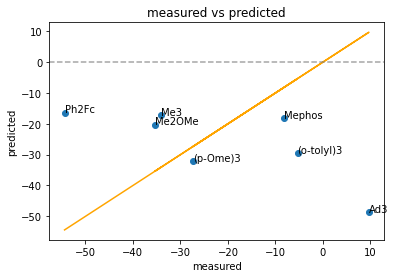

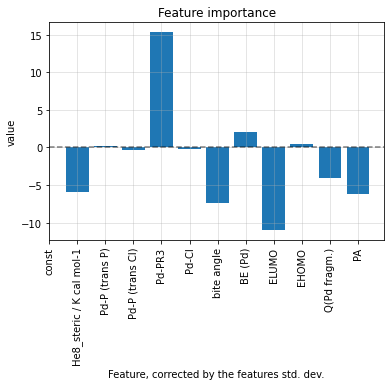

In [26]:
model_tts(params, print_summary=False)

Int64Index([0, 1, 5, 15, 11, 14, 8], dtype='int64')
r2: 0.9826002658182369
RMSE: 6.047220164485463


,std coef,p val
EHOMO,22.116120,0.112039
PA,10.452727,0.407732
He8_steric / K cal mol-1,7.889616,0.148767
Pd-PR3,5.033946,0.216778
BE (Pd),2.188857,0.547282
const,NaN,0.237689


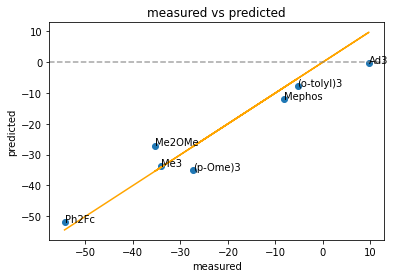

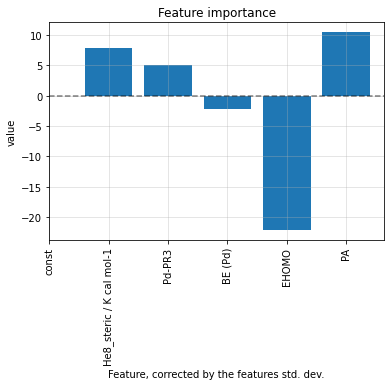

In [27]:
model_tts(params3, print_summary=False)

Int64Index([0, 1, 5, 15, 11, 14, 8], dtype='int64')
r2: 0.9732639996015429
RMSE: 10.395052174139252


,std coef,p val
He8_steric / K cal mol-1,13.886743,0.000657
EHOMO,8.440879,0.232353
BE (Pd),6.748331,0.003783
PA,4.045021,0.534932
const,NaN,0.998304


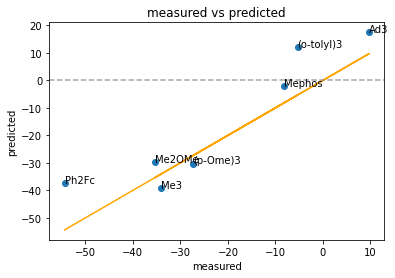

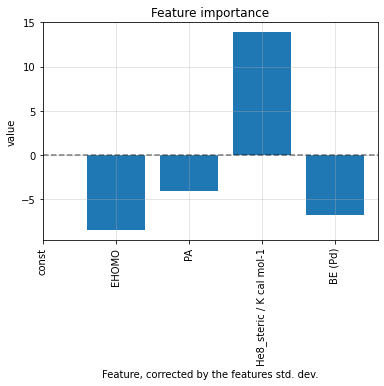

In [28]:
model_tts(params = ['EHOMO', 'PA', 'He8_steric / K cal mol-1', 'BE (Pd)'])

Int64Index([0, 1, 5, 15, 11, 14, 8], dtype='int64')
r2: 0.8023914943561234
RMSE: 7.942339853893189


,std coef,p val
He8_steric / K cal mol-1,15.581041,0.002919
EHOMO,11.218835,0.001509
const,NaN,0.000482


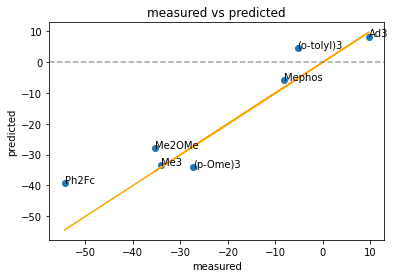

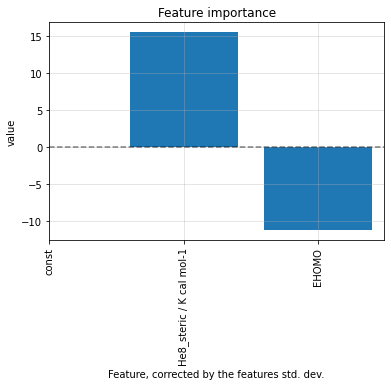

In [29]:
model_tts(params5)

Int64Index([0, 1, 5, 15, 11, 14, 8], dtype='int64')
r2: 0.08736169578340458
RMSE: 17.01022382004516


,std coef,p val
He8_steric / K cal mol-1,4.863747,0.407026
const,NaN,0.024601


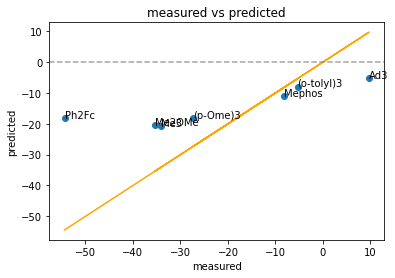

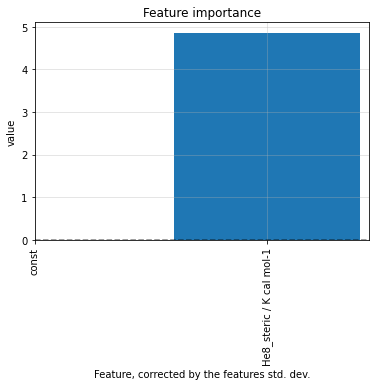

In [30]:
model_tts(params='He8_steric / K cal mol-1')

Int64Index([0, 1, 5, 15, 11, 14, 8], dtype='int64')
r2: 0.23967098085426974
RMSE: 20.452703343477147


,std coef,p val
EHOMO,5.145811,0.150948
const,NaN,0.051866


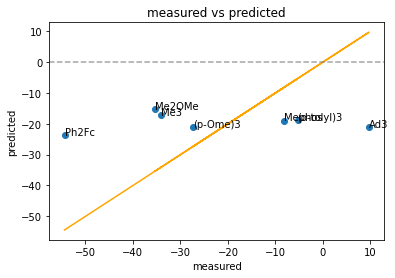

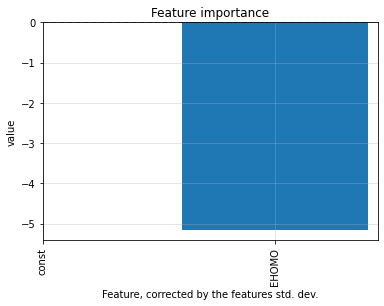

In [31]:
model_tts(params='EHOMO')

------------